In [26]:
!pip install catboost
!pip install xgboost

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

## Importing the dataset

In [68]:
dataset = pd.read_csv('train.csv')

dataset_2 = pd.read_csv('test.csv')

In [3]:
dataset.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


## Data Preprocessing

Label Encoding Categorical Variables

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['housing'] = le.fit_transform(dataset['housing'])
dataset['loan'] = le.fit_transform(dataset['loan'])
dataset['default'] = le.fit_transform(dataset['default'])

In [5]:
dataset.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,0,7,0,0,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,0,514,0,0,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,0,602,1,0,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,0,34,1,0,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,0,889,1,0,cellular,3,feb,902,1,-1,0,unknown,1


Dropping Some Features

In [70]:
dataset.drop(['day', 'month'], axis=1, inplace=True)

In [7]:
dataset.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,0,7,0,0,cellular,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,0,514,0,0,unknown,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,0,602,1,0,unknown,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,0,34,1,0,unknown,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,0,889,1,0,cellular,902,1,-1,0,unknown,1


Getting the Dummy Variables

In [71]:
dataset = pd.get_dummies(dataset, columns=['job', 'marital', 'education', 'contact', 'poutcome'])

In [72]:
dataset.head().columns

Index(['id', 'age', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [73]:
dataset = dataset[['id', 'age', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y']]

In [11]:
dataset.head()

,id,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0,42,0,7,0,0,117,3,-1,0,...,False,False,True,False,False,False,False,False,True,0
1,1,38,0,514,0,0,185,1,-1,0,...,False,False,False,False,True,False,False,False,True,0
2,2,36,0,602,1,0,111,2,-1,0,...,False,False,False,False,True,False,False,False,True,0
3,3,27,0,34,1,0,10,2,-1,0,...,False,False,False,False,True,False,False,False,True,0
4,4,26,0,889,1,0,902,1,-1,0,...,False,False,True,False,False,False,False,False,True,1


Creating the Dependent and Independent Features

In [74]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [75]:
print(X)

[[42 0 7 ... False False True]
 [38 0 514 ... False False True]
 [36 0 602 ... False False True]
 ...
 [50 0 217 ... False False True]
 [32 0 -274 ... False False True]
 [42 0 1559 ... False False False]]


In [76]:
print(y)

[0 0 0 ... 0 0 0]


## Training & Testing the Dataset

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##  

## **BUILDING THE ALGORITHM**

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

## XG Boost

In [25]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Cat Boost

In [78]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.158199
0:	learn: 0.4659201	total: 296ms	remaining: 4m 56s
1:	learn: 0.3445788	total: 587ms	remaining: 4m 52s
2:	learn: 0.2831757	total: 863ms	remaining: 4m 46s
3:	learn: 0.2492344	total: 1.15s	remaining: 4m 46s
4:	learn: 0.2297208	total: 1.43s	remaining: 4m 45s
5:	learn: 0.2175168	total: 1.68s	remaining: 4m 39s
6:	learn: 0.2098678	total: 1.95s	remaining: 4m 36s
7:	learn: 0.2029752	total: 2.22s	remaining: 4m 35s
8:	learn: 0.1993381	total: 2.48s	remaining: 4m 33s
9:	learn: 0.1961365	total: 2.6s	remaining: 4m 17s
10:	learn: 0.1940391	total: 2.73s	remaining: 4m 5s
11:	learn: 0.1914718	total: 2.86s	remaining: 3m 55s
12:	learn: 0.1900664	total: 2.99s	remaining: 3m 46s
13:	learn: 0.1888282	total: 3.11s	remaining: 3m 39s
14:	learn: 0.1864943	total: 3.24s	remaining: 3m 32s
15:	learn: 0.1857610	total: 3.36s	remaining: 3m 26s
16:	learn: 0.1847906	total: 3.5s	remaining: 3m 22s
17:	learn: 0.1837907	total: 3.63s	remaining: 3m 17s
18:	learn: 0.1831880	total: 3.75s	remaining: 3m

## ANN

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [36]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [37]:
ann.add(tf.keras.layers.Dense(units= 6, activation= 'relu'))

### Adding the second hidden layer

In [38]:
ann.add(tf.keras.layers.Dense(units= 6, activation= 'relu'))

### Adding the output layer

In [39]:
ann.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [40]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [41]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9021 - loss: 0.2208
Epoch 2/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9125 - loss: 0.1913
Epoch 3/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9147 - loss: 0.1868
Epoch 4/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9156 - loss: 0.1861
Epoch 5/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9160 - loss: 0.1845
Epoch 6/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9163 - loss: 0.1851
Epoch 7/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9171 - loss: 0.1836
Epoch 8/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9168 - loss: 0.1848
Epoch 9/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9174 - loss: 0.1840
Epoch 10/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9176 - loss: 0.1836
Epoch 11/100
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9173 -

##  

## **MODEL ACCURACY**

## ANN

Predicting Results

In [42]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 5s 993us/step
[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


Confusion Matrix

[[127593   4202]
 [  7997  10208]]


0.9186733333333333

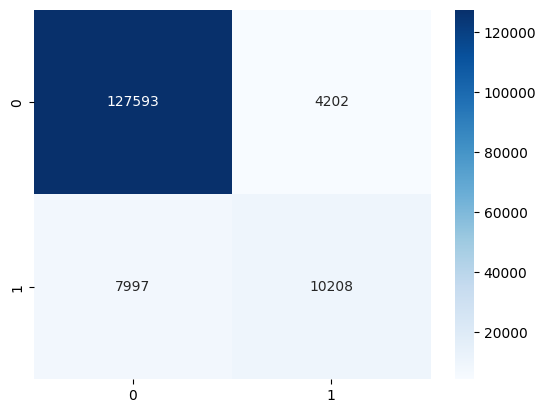

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

## Logistic Regression

Predicting Results

In [41]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


Confusion Matrix

[[127801   3994]
 [ 10080   8125]]


0.9061733333333334

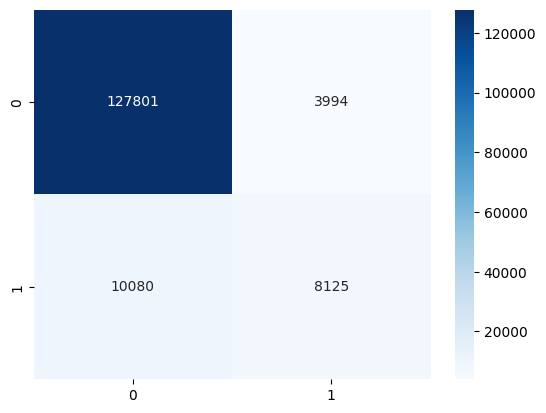

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [43]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 90.52 %
Standard Deviation: 0.15 %


## Naive Bayes

Predicting Results

In [49]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


Confusion Matrix

[[116398  15397]
 [  7874  10331]]


0.84486

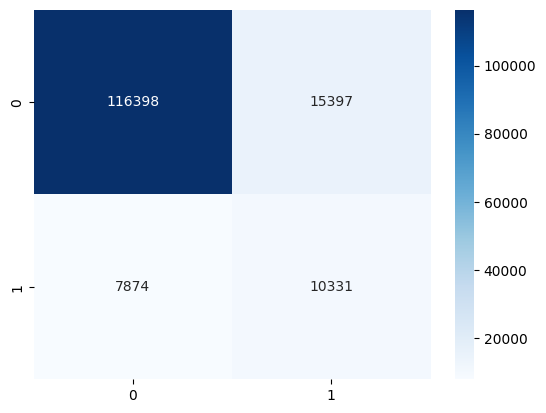

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.37 %
Standard Deviation: 0.07 %


Predicting Results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix

[[4687    0]
 [1313    0]]


0.7811666666666667

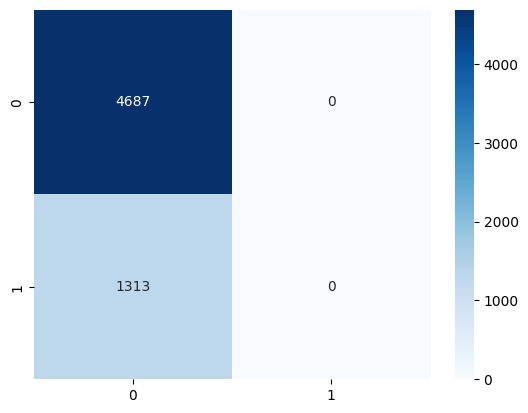

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.82 %
Standard Deviation: 0.02 %


## Decision Trees

Predicting Results

In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


Confusion Matrix

[[124247   7548]
 [  7474  10731]]


0.8998533333333333

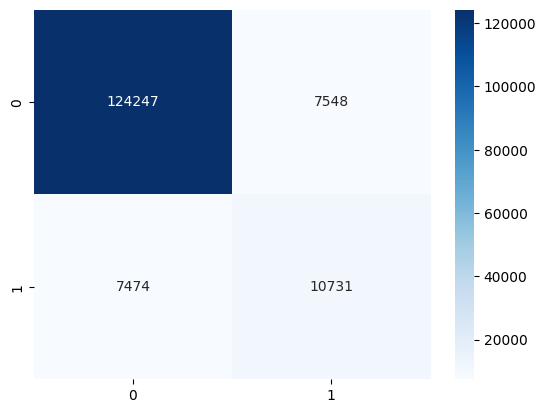

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.95 %
Standard Deviation: 0.11 %


## Random Forest

Predicting Results

In [22]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


Confusion Matrix

[[127823   3972]
 [  8391   9814]]


0.91758

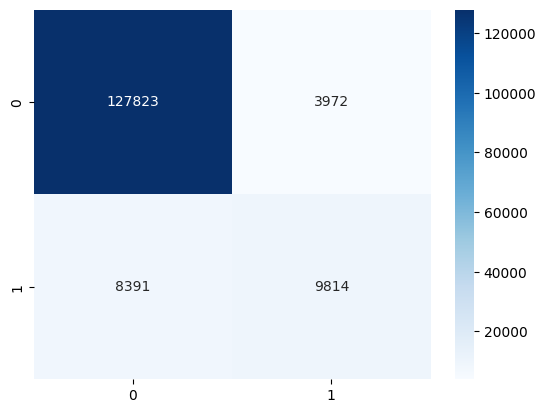

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.75 %
Standard Deviation: 0.13 %


## XG Boost

Predicting Results

In [26]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


Confusion Matrix

[[127736   4059]
 [  6941  11264]]


0.9266666666666666

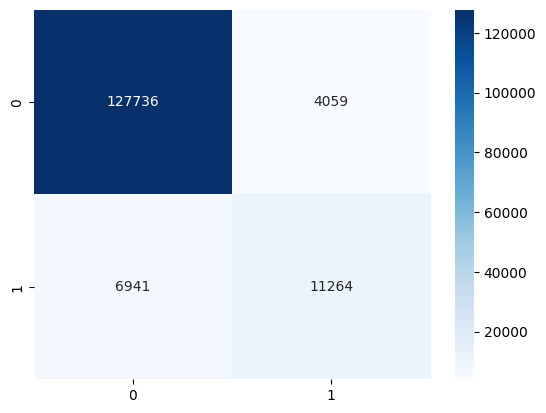

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [28]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.63 %
Standard Deviation: 0.12 %


## Cat Boost

Predcting Results

In [45]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


Confusion Matrix

[[127938   3857]
 [  6910  11295]]


0.92822

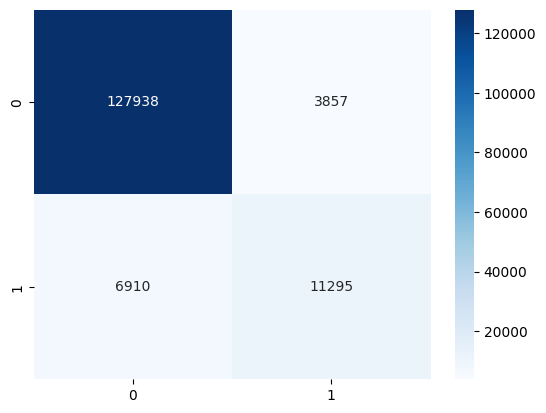

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['0', '1'], yticklabels=['0', '1'], fmt='d', cmap='Blues', annot=True)
print(cm)
accuracy_score(y_test, y_pred)

K-Fold Validation


In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.2132817	total: 2.02s	remaining: 4m 46s
7:	learn: 0.2065403	total: 2.16s	remaining: 4m 28s
8:	learn: 0.2020148	total: 2.31s	remaining: 4m 13s
9:	learn: 0.1985603	total: 2.45s	remaining: 4m 2s
10:	learn: 0.1962322	total: 2.58s	remaining: 3m 52s
11:	learn: 0.1937539	total: 2.75s	remaining: 3m 46s
12:	learn: 0.1919779	total: 2.89s	remaining: 3m 39s
13:	learn: 0.1903040	total: 3.03s	remaining: 3m 33s
14:	learn: 0.1888681	total: 3.18s	remaining: 3m 28s
15:	learn: 0.1877991	total: 3.32s	remaining: 3m 24s
16:	learn: 0.1868437	total: 3.46s	remaining: 3m 19s
17:	learn: 0.1859633	total: 3.6s	remaining: 3m 16s
18:	learn: 0.1849126	total: 3.77s	remaining: 3m 14s
19:	learn: 0.1843635	total: 3.9s	remaining: 3m 11s
20:	learn: 0.1836226	total: 4.03s	remaining: 3m 8s
21:	learn: 0.1830113	total: 4.18s	remaining: 3m 5s
22:	learn: 0.1826020	total: 4.32s	remaining: 3m 3s
23:	learn: 0.1822176	total: 4.45s	remaining: 3m 1s
24:	learn: 0.1818119	tot

##    


## **Project Summary:**

This project focuses on building and evaluating several classification models to predict a target variable `y` based on a given dataset which is the Bank Marketing Dataset. My goal was to predict whether a client will subscribe to a bank term deposit using the (`train.csv`) dataset to train the models, and test on new entries using the (`test.csv`) dataset. The process followed includes:

1.  **Library Imports and Installation of both XGBoost & CatBoost Models:** Necessary libraries for data manipulation, machine learning, and visualization (pandas, numpy, tensorflow, scikit-learn) are imported.
2.  **Data Loading:** The training and testing datasets (`train.csv` and `test.csv`) are loaded into pandas DataFrames.
3.  **Data Preprocessing:**
    *   Label Encoding is applied to binary categorical features ('housing', 'loan', 'default').
    *   Columns 'day' and 'month' are dropped.
    *   One-Hot Encoding is applied to the remaining categorical features ('job', 'marital', 'education', 'contact', 'poutcome') to convert them into a numerical format.
    *   The features (X) and the target variable (y) are separated.
4.  **Data Splitting:** The dataset is split into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) using `train_test_split`.
5.  **Model Building and Training:** Several classification models are built and trained on the training data:
    *   Logistic Regression
    *   Naive Bayes
    *   Decision Trees
    *   Random Forest
    *   XG Boost
    *   Cat Boost
    *   Artificial Neural Network (ANN) - including Feature Scaling and defining the ANN architecture.
6.  **Model Evaluation:** For each model, the following evaluation steps are performed on the test set:
    *   **Prediction:** Predictions (`y_pred`) are made on the `X_test` data.
    *   **Confusion Matrix:** A confusion matrix is generated and displayed to visualize the model's performance in terms of true positives, true negatives, false positives, and false negatives.
    *   **Accuracy Score:** The accuracy score is calculated and printed.
    *   **K-Fold Cross-Validation:** Cross-validation is performed on the training set to get a more robust estimate of the model's performance, reporting the mean accuracy and standard deviation.

## **Best Model:**

Based on the provided accuracy scores from the confusion matrices and K-Fold cross-validation, the **Cat Boost** model appears to be the best performing model among those trained.

Here are the accuracy scores from the notebook outputs:

*   **ANN:** Test Accuracy: 0.9187
*   **Logistic Regression:** Test Accuracy: 0.9062, Cross-Validation Accuracy: 90.52 %
*   **Naive Bayes:** Test Accuracy: 0.8449, Cross-Validation Accuracy: 84.37 %
*   **Decision Trees:** Test Accuracy: 0.8999, Cross-Validation Accuracy: 89.95 %
*   **Random Forest:** Test Accuracy: 0.9176, Cross-Validation Accuracy: 91.75 %
*   **XG Boost:** Test Accuracy: 0.9267, Cross-Validation Accuracy: 92.63 %
*   **Cat Boost:** Test Accuracy: 0.9282, Cross-Validation Accuracy: 92.77 % (based on the last cross-validation output)


The **Cat Boost** model achieved the highest accuracy on both the test set and during cross-validation during the training, indicating it generalizes well to unseen data compared to the other models in this project.

## **Model Prediction (`test.csv`)**
Subsequently, I will use only the **CatBoost** model to predict the the 'y' (target feature) on the test data, as that is a new input of data without the target feature.

We will follow the same data preprocessing steps for the (`test.csv`) dataset, in order to get accurate results

##   


## **Model Prediction Test Dataset**

## Data Preprocessing

In [57]:
dataset_2.head().columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [58]:
dataset_2_new = dataset_2[['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome']]

In [59]:
dataset_2_new.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_2_new['housing'] = le.fit_transform(dataset_2_new['housing'])
dataset_2_new['loan'] = le.fit_transform(dataset_2_new['loan'])
dataset_2_new['default'] = le.fit_transform(dataset_2_new['default'])

In [61]:
dataset_2_new.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,0,1397,1,0,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,0,23,1,0,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,0,46,1,1,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,0,-1380,1,1,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,0,1950,1,0,cellular,22,jul,181,1,-1,0,unknown


In [62]:
dataset_2_new.drop(['day', 'month'], axis=1, inplace=True)

In [64]:
dataset_2_new.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,0,1397,1,0,unknown,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,0,23,1,0,cellular,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,0,46,1,1,cellular,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,0,-1380,1,1,unknown,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,0,1950,1,0,cellular,181,1,-1,0,unknown


Getting Dummy Variables

In [65]:
dataset_2_new = pd.get_dummies(dataset_2_new, columns=['job', 'marital', 'education', 'contact', 'poutcome'])

In [66]:
dataset_2_new.head().columns

Index(['id', 'age', 'default', 'balance', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

## Cat Boost

In [88]:
print(dataset_2_new.shape)

(250000, 36)


In [89]:
X_test = dataset_2_new

In [90]:
print(X_test.shape)

(250000, 36)


Predcting Results

In [91]:
y_pred = classifier.predict(X_test)
print((y_pred.reshape(len(y_pred),1)))

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [92]:
dataset_2_new.shape

(250000, 36)

In [94]:
y_pred.shape

(250000,)

In [105]:
dataset_2_new['y'] = y_pred

In [106]:
dataset_2_new.head()

,id,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,750000,32,0,1397,1,0,224,1,-1,0,...,False,False,False,False,True,False,False,False,True,0
1,750001,44,0,23,1,0,586,2,-1,0,...,True,False,True,False,False,False,False,False,True,0
2,750002,36,0,46,1,1,111,2,-1,0,...,False,False,True,False,False,False,False,False,True,0
3,750003,58,0,-1380,1,1,125,1,-1,0,...,False,False,False,False,True,False,False,False,True,0
4,750004,28,0,1950,1,0,181,1,-1,0,...,False,False,True,False,False,False,False,False,True,0


In [98]:
dataset_2['y'] = y_pred

In [100]:
dataset_2.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown,0
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown,0
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown,0
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown,0
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown,0


In [99]:
dataset_2['y'].value_counts()

,count
y,
0,249415
1,585


In [102]:
dataset_2 = dataset_2[['id', 'y']]

In [103]:
dataset_2.head()

,id,y
0,750000,0
1,750001,0
2,750002,0
3,750003,0
4,750004,0


In [104]:
dataset_2.to_csv('test_predictions.csv', index=False)